In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Absenteeism_at_work.csv", sep=';')
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [47]:
X = data.drop("Absenteeism time in hours", axis = 1)
y = data["Absenteeism time in hours"]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
dtr = RandomForestRegressor()
#train model
dtr.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
y_pred = dtr.predict(X_test)

In [35]:
#Train's score 
print("Train R^2 score is: ", dtr.score(X_train, y_train))

Train R^2 score is:  0.7789348775666751


In [36]:
#Train's score 
print("Test R^2 score is: ", dtr.score(X_test, y_test))

Test R^2 score is:  0.14309578850187432


In [38]:
#tim cac thuoc tinh quan trong
feature_imp = pd.Series(dtr.feature_importances_, index = np.array(X.columns))
feature_imp

ID                                 0.058995
Reason for absence                 0.256963
Month of absence                   0.063986
Day of the week                    0.080555
Seasons                            0.069339
Transportation expense             0.064026
Distance from Residence to Work    0.027702
Service time                       0.020346
Age                                0.026924
Work load Average per day          0.115961
Hit target                         0.065925
Disciplinary failure               0.002108
Education                          0.007004
Son                                0.025956
Social drinker                     0.009736
Social smoker                      0.002357
Pet                                0.005397
Weight                             0.042051
Height                             0.033291
Body mass index                    0.021377
dtype: float64

In [39]:
feature_imp[feature_imp>0.05].sum()

0.7757503764468944

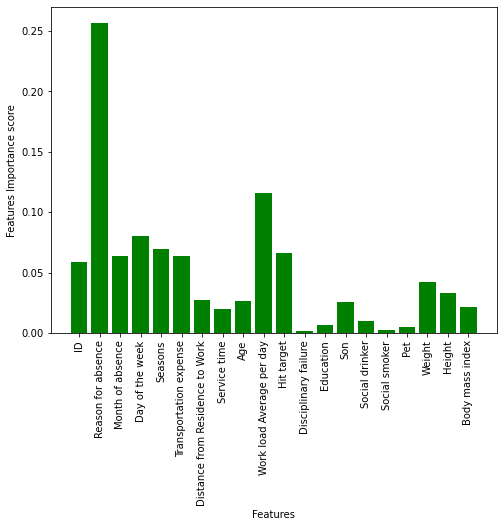

In [40]:
plt.figure(figsize=(8,6))
plt.bar(feature_imp.index, feature_imp, color = "g")
plt.xlabel("Features")
plt.ylabel("Features Importance score")
plt.xticks(feature_imp.index, rotation = 'vertical')
plt.show()

In [48]:
X_now = X[['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons']]
y_now = y

In [49]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_now,y_now, test_size = 0.3)

In [50]:
model = RandomForestRegressor()
#train model
model.fit(X_train1, y_train1)

RandomForestRegressor()

In [52]:
y_predict = model.predict(X_test1)

In [56]:
#Train's score 
print("Train R^2 score is: ", model.score(X_train1, y_train1))

Train R^2 score is:  0.8229117329432649


In [57]:
#Train's score 
print("Test R^2 score is: ", model.score(X_test1, y_test1))

Test R^2 score is:  0.005503004457482641
